In [4]:
import cv2
import os
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import pyplot as plt
from PIL import Image
from mtcnn import MTCNN
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
def compute_face_embedding(face_image, resize_width=100, resize_height=100):
    """
    Compute the feature vector for a detected face image.
    
    Args:
        face_image: The detected face image (RGB format).
        resize_width: The width to resize the face image to (default is 100).
        resize_height: The height to resize the face image to (default is 100).
        
    Returns:
        The feature vector for the detected face.
    """
    # Resize the face image to a common size
    face_image_resized = cv2.resize(face_image, (resize_width, resize_height))
    
    # Compute the feature vector by flattening the resized image
    face_embedding = face_image_resized.flatten()
    
    return face_embedding

In [6]:
image_path ="C:/Users/15anu/Desktop/PROJECT FACE RECOGNITION/trial.jpg"

In [7]:
image = cv2.imread(image_path)

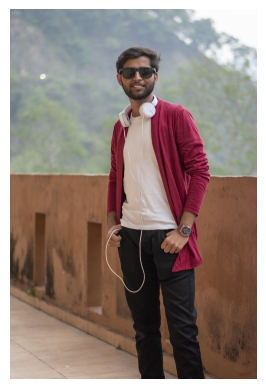

In [8]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [9]:
search_folder_path = "D:/photos"
search_image_paths = [os.path.join(search_folder_path, f) for f in os.listdir(search_folder_path) if os.path.isfile(os.path.join(search_folder_path, f))]

In [10]:
files_in_folder = os.listdir(search_folder_path)
print("Files in the folder:")
for file_name in files_in_folder:
    print(file_name)

Files in the folder:
_DSC0016.jpg
_DSC0222.jpg
_DSC0223.jpg
_DSC0224.jpg
_DSC0225.jpg
_DSC0226.jpg
_DSC0227.jpg
_DSC0228.jpg
_DSC0229.jpg
_DSC0230.jpg
_DSC0231.jpg
_DSC0232.jpg
_DSC0233.jpg
_DSC0234.jpg
_DSC0235.jpg
_DSC0236.jpg
_DSC0237.jpg
_DSC0238.jpg
_DSC0239.jpg
_DSC0240.jpg
_DSC0241.jpg
_DSC0242.jpg
_DSC0591.jpg
_DSC0592.jpg
_DSC0596.jpg
_DSC0597.jpg
_DSC0598.jpg
_DSC0599.jpg


In [11]:
image_array = np.array(image_rgb)
print(image_array)

[[[105 118 127]
  [ 96 109 118]
  [115 128 137]
  ...
  [251 251 251]
  [251 251 251]
  [252 252 252]]

 [[105 118 127]
  [118 131 140]
  [126 139 148]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[122 135 144]
  [114 127 136]
  [108 121 130]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 ...

 [[200 183 175]
  [201 184 176]
  [202 185 177]
  ...
  [103  70  51]
  [ 91  58  39]
  [106  69  53]]

 [[203 186 178]
  [198 181 173]
  [197 180 172]
  ...
  [ 84  51  34]
  [ 85  54  36]
  [ 87  56  38]]

 [[197 180 172]
  [209 192 184]
  [202 185 177]
  ...
  [ 79  46  31]
  [ 94  61  46]
  [ 98  67  49]]]


In [12]:
detector = MTCNN()

In [13]:
faces = detector.detect_faces(image_array)

1/1 [==============================] - 0s 296ms/step


In [14]:
print(faces)

[{'box': [1782, 782, 506, 641], 'confidence': 0.9999953508377075, 'keypoints': {'left_eye': (1942, 1022), 'right_eye': (2179, 1014), 'nose': (2076, 1134), 'mouth_left': (1966, 1256), 'mouth_right': (2177, 1253)}}]


In [15]:
print("Number of faces detected:", len(faces))

Number of faces detected: 1


In [16]:
for i, face in enumerate(faces):
    print("Face", i+1, "Bounding Box:", face['box'])

Face 1 Bounding Box: [1782, 782, 506, 641]


In [17]:
matched_images = []  # List to store matched images
if faces:
    face_bbox = faces[0]['box']
    face_image = image_rgb[face_bbox[1]:face_bbox[1]+face_bbox[3], face_bbox[0]:face_bbox[0]+face_bbox[2]]
    face_embedding = compute_face_embedding(face_image)
    search_folder_path = "D:/photos"
    for file_name in os.listdir(search_folder_path):
        search_image_path = os.path.join(search_folder_path, file_name)
        search_image = cv2.imread(search_image_path)
        search_image_rgb = cv2.cvtColor(search_image, cv2.COLOR_BGR2RGB)
        search_faces = detector.detect_faces(search_image_rgb)
        for search_face in search_faces:
            search_face_bbox = search_face['box']
            search_face_image = search_image_rgb[search_face_bbox[1]:search_face_bbox[1]+search_face_bbox[3], search_face_bbox[0]:search_face_bbox[0]+search_face_bbox[2]]
            search_face_embedding = compute_face_embedding(search_face_image)
            similarity_score = cosine_similarity([face_embedding], [search_face_embedding])
            threshold = 0.9
            if similarity_score > threshold:
                print("Match found in:", search_image_path)
                matched_images.append(search_image)

1/1 [==============================] - 0s 59ms/step
Match found in: D:/photos\_DSC0222.jpg
1/1 [==============================] - 0s 40ms/step
Match found in: D:/photos\_DSC0223.jpg
1/1 [==============================] - 0s 37ms/step
Match found in: D:/photos\_DSC0224.jpg
2/2 [==============================] - 0s 18ms/step
Match found in: D:/photos\_DSC0225.jpg
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 59ms/step
Match found in: D:/photos\_DSC0230.jpg
1/1 [==============================] - 0s 170ms/step


1/1 [==============================] - 0s 51ms/step
Match found in: D:/photos\_DSC0238.jpg
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


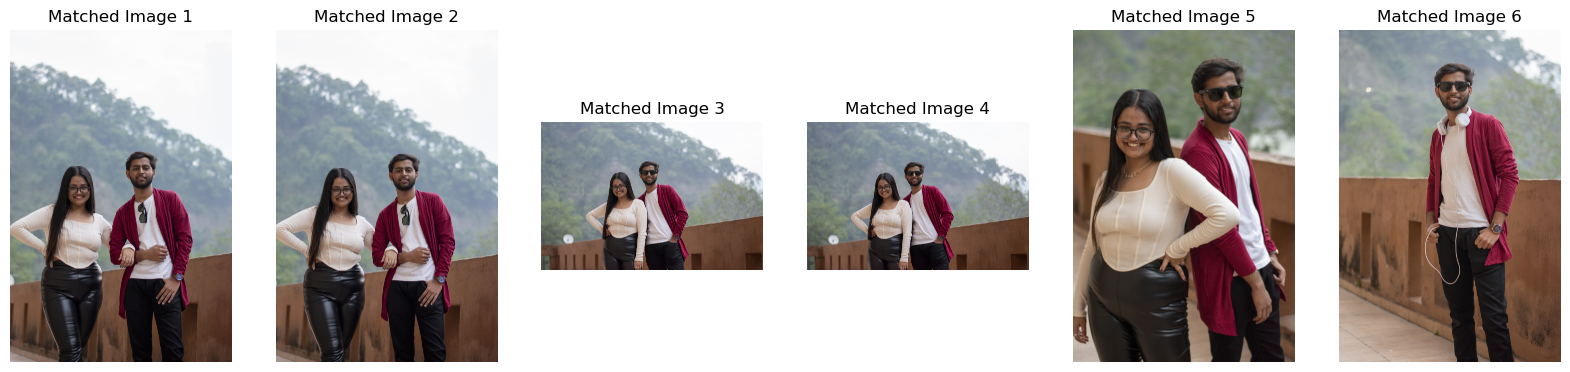

In [19]:
num_matched_images = len(matched_images)
fig, axes = plt.subplots(1, num_matched_images, figsize=(20, 5))

for i, matched_image in enumerate(matched_images):
    axes[i].imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Matched Image {i+1}')

plt.show()